The autograder will run with the following imports (and only the following imports). As both of these imports are required, in order to work on this assignment locally, you should follow the instructions on the webpage. 

In [110]:
import mmh3
import BitVector as bv
import string
import pandas as pd

For this MP, you will be using the [mmh3 hash](https://pypi.org/project/mmh3/). This hash is very efficient and great for real world data although ironically the data provided and used by the autograder will be using it in exactly the wrong context. To quote the authors:

*As MurMur3 creates a fairly big print (128 bits), so it’s not recommended to use it for hashing small data sets like words, short strings, integers and so on. The embedded hash functions for these simple and small data types provide excellent performance with low collision rate. So anything that is less than a couple dozen, or preferably hundreds of bytes is not a good candidate.*

In [111]:
#INPUT:
# A hashable datatype (probably string) value containing the object being hashed
# An optional integer argument seed storing the seed to provide mmh3
#OUTPUT:
# An integer value containing the output hash value for the input object

def seededHash(value, seed=None):
    if seed:
        return mmh3.hash(value, seed)
    return mmh3.hash(value)

In [112]:
#grade

#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (k) storing the number of hash minima you need to keep track of
# An optional argument (seed) which sets the random seed used to generate the hash function
#OUTPUT:
# A set of integers storing the k-minimum hash values produced by passing each item in inSet through seededHash
def minHash(inSet, k, seed=None):
    a=[]
    for i in inSet:
        a.append(seededHash(i, seed))
    return set(sorted(a)[:k])

In [113]:
#grade

#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (m) storing the size of the bloom filter being constructed
# Two optional integer arguments (hs1 and hs2) storing hash seeds for the BF's first and second hash
#OUTPUT:
# A BitVector of size m containing all input items hashed using both hs1 and hs2 seeds
def bloomFilter(inSet, m, hs1=0, hs2=10):
    bvector = bv.BitVector(size = m)
    for i in inSet:
        b=[]
        h1=(seededHash(i,hs1))%m
        h2=(seededHash(i,hs2))%m
        bvector[h1]=1
        bvector[h2]=1
    return bvector

In [114]:
#grade

#INPUT:
# Two input sets (inSet1 and inSet2) containing sets of the same hashable data type
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
# NOTE: You can use this function to calculate the exact similarity between raw datasets
# and also the Minhash similarity (since a Minhash sketch is *literally* just a set)
def jaccard(inSet1, inSet2):
    #YOUR CODE HERE
    a = inSet1.intersection(inSet2)
    b = inSet1.union(inSet2)
    c = len(a)/len(b)
    
    return c

In [115]:
#grade

#INPUT:
# Two input BitVectors (bf1 and bf2) containing two equal length bloom filters
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
def bf_jaccard(bf1, bf2):
    a = 0
    b = 0
    bf1_list = list(bf1)
    bf2_list = list(bf2)
    for i in range(len(bf1_list)):
        if bf1_list[i] == bf2_list[i] and bf1_list[i] == 1:
            a += 1
            b += 1
        elif (bf1_list[i] == 1 and bf2_list[i] != 1) or (bf2_list[i] == 1 and bf1_list[i] != 1):
            b += 1
        
    return a / b


In [116]:
#grade

#INPUT:
# A BitVector object bf, containing a bloom filter
# A hashable data type (probably string) val, containing the value being searched for
# Two optional integer arguments storing hash seeds for the BF's first and second hash
#OUTPUT:
# A bool (True or False) based on whether or not val is present in BF.
# NOTE: The Bloom Filter is probabilistic and some of the time will return 'True' 
# even if the item is not present.
def bf_find(bf, val, hs1=0, hs2=10):
    a = (seededHash(val,hs1))%len(str(bf))
    b = (seededHash(val,hs2))%len(str(bf))
    if bf[a] == 1 and bf[b] ==1:
        return 1
    else:
        return 0


Run-Code

In [117]:
# An example on how to use seededHash
print(seededHash('From', seed=4))

s1 = set(["1", "2", "3", "4", "5", "6", "7", "8"])
s2 = set(["11", "12", "13", "4", "5", "16", "17", "18"])
s3 = set(["11", "12", "13", "24", "25", "6", "17", "18"])

k = 3
mh1 = minHash(s1, k)
mh2 = minHash(s2, k)
mh3 = minHash(s3, k)

m = 50
bf1 = bloomFilter(s1, m)
bf2 = bloomFilter(s2, m)
bf3 = bloomFilter(s3, m)

print("raw:", jaccard(s1, s2)) #0.14285714285714285
print("mh:", jaccard(mh1, mh2)) #0.0
print("bf:", bf_jaccard(bf1, bf2)) #0.21739130434782608

print("raw:", jaccard(s1, s3)) # 0.06666666666666667
print("mh:",jaccard(mh1, mh3)) # 0.0
print("bf:",bf_jaccard(bf1, bf3)) #0.16666666666666666

print("raw:",jaccard(s2, s3)) # 0.45454545454545453
print("mh:",jaccard(mh2, mh3)) # 0.5
print("bf:",bf_jaccard(bf2, bf3)) # 0.5555555555555556

# BF will 100% of the time give the correct answer for items that exist
findValue = "11"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))

# A small percentage of the time it will think an item exists that was not in the set
findValue = "9"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))


601558399
raw: 0.14285714285714285
mh: 0.0
bf: 0.21739130434782608
raw: 0.06666666666666667
mh: 0.0
bf: 0.16666666666666666
raw: 0.45454545454545453
mh: 0.5
bf: 0.5555555555555556
0
1
1
1
0
0


Here's an example of a dataset analysis of just two items (using fixed values of k and m)! You should not use these same values without considering or testing alternatives, they likely won't work for your dataset.

In [118]:
df=pd.read_csv("kdrama.csv")

df["length total"] = df["Duration"] * df["Episodes"]
df = df[["Title", "length total", "Main Role"]]
df_all = df
df = df.head(10)
df

,Title,length total,Main Role
0,Move to Heaven,520,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,Weak Hero Class 1,320,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,Hospital Playlist Season 2,1200,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
3,Flower of Evil,1120,"Lee Joon Gi, Jang Hee Jin, Moon Chae Won, Seo ..."
4,Hospital Playlist,1080,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."
5,Alchemy of Souls,1600,"Lee Jae Wook, Hwang Min Hyun, Yoo Joon Sang, J..."
6,Reply 1988,1900,"Lee Hye Ri, Ryu Joon Yeol, Lee Dong Hwi, Go Ky..."
7,My Mister,1232,"Lee Sun Kyun, IU"
8,The Glory Part 2,440,"Song Hye Kyo, Im Ji Yeon, Park Sung Hoon, Lee ..."
9,Under the Queen's Umbrella,1120,"Kim Hye Soo, Choi Won Young, Moon Sang Min, Ch..."


In [119]:
df["length total"][0]
sett = set(df["length total"])
settt = []
for i in sett:
    settt.append(str(i))
sett = set(settt)
sett

df["Title"][0]
Titles = set(df["Title"])
Titless = []
for i in Titles:
    Titless.append(str(i))
Titles = set(Titless)
Titles

{'Alchemy of Souls ',
 'Flower of Evil ',
 'Hospital Playlist ',
 'Hospital Playlist Season 2 ',
 'Move to Heaven',
 'My Mister ',
 'Reply 1988 ',
 'The Glory Part 2 ',
 "Under the Queen's Umbrella ",
 'Weak Hero Class 1 '}

In [138]:
# Checking BloomFilter

def bloomFilter(inSet, m, hs1=0, hs2=10):
    bvector = bv.BitVector(size = m)
    for i in inSet:
        b=[]
        h1=(seededHash(i,hs1))%m
        h2=(seededHash(i,hs2))%m
        bvector[h1]=1
        bvector[h2]=1
    return bvector

def InBloomFilter(actor, drama, m, hs1=0, hs2=10):
    inSet = set(list(df["Main Role"])[list(df["Title"]).index(drama)].split(","))
    bvector = bloomFilter(inSet, m, hs1, hs2)
    
    h1 = (seededHash(actor, hs1)) % m
    h2 = (seededHash(actor, hs2)) % m
    
    if bvector[h1] == 1 and bvector[h2] == 1:
        return True
    else:
        return False



InBloomFilter("Park Ji Hoon", "Weak Hero Class 1 " , 1000)



True

<AxesSubplot:>

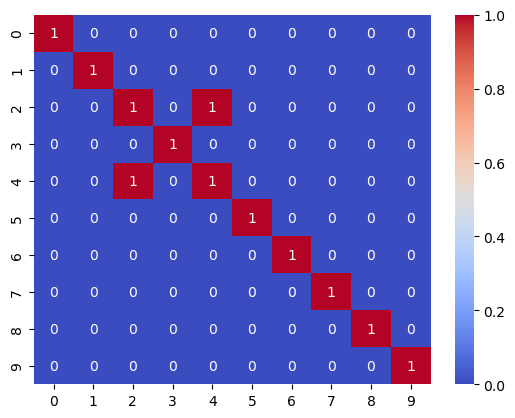

In [131]:
#Jaccard
import seaborn as sns
my_sets = [set(actor.split(",")) for actor in df["Main Role"]]
similarity_df = pd.DataFrame(columns=range(len(my_sets)), index=range(len(my_sets)))

for i, s1 in enumerate(my_sets):
    for j, s2 in enumerate(my_sets):
        if j > i:
            jaccard_sim = jaccard(s1, s2)
            similarity_df.loc[i, j] = jaccard_sim
            similarity_df.loc[j, i] = jaccard_sim

similarity_df.fillna(1, inplace=True)
sns.heatmap(similarity_df, cmap='coolwarm', annot=True, vmin=0, vmax=1)


<AxesSubplot:>

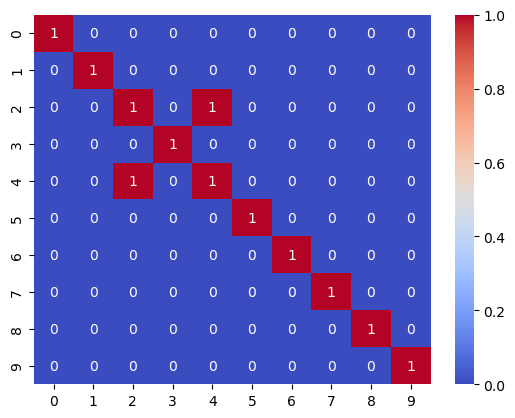

In [137]:
#BFJaccard
my_sets = [set(actor.split(",")) for actor in df["Main Role"]]
bf_list = []
for s in my_sets:
    bf = bloomFilter(s, 10000, hs1=0, hs2=10)
    bf_list.append(bf)
similarity= pd.DataFrame(columns=range(len(bf_list)), index=range(len(bf_list)))
for i, bf1 in enumerate(bf_list):
    for j, bf2 in enumerate(bf_list):
        if j > i:
            jbm = bf_jaccard(bf1, bf2)
            similarity_df.loc[i, j] = jbm
            similarity_df.loc[j, i] = jbm
similarity_df.fillna(1, inplace=True)
sns.heatmap(similarity_df, cmap='coolwarm', annot=True, vmin=0, vmax=1)


<AxesSubplot:>

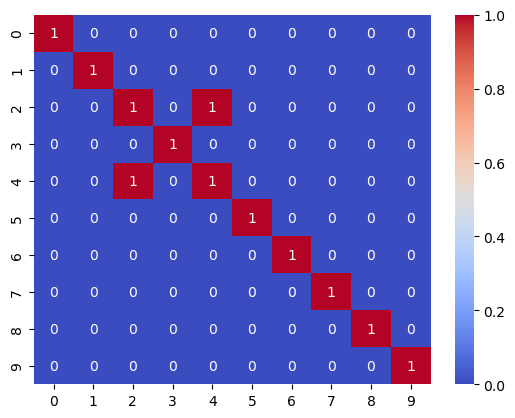

In [143]:
#Minhash
my_sets = [set(actor.split(",")) for actor in df["Main Role"]]
minhash_list = []
for s in my_sets:
    minhash_sig = minHash(s, 10, seed=None)
    minhash_list.append(minhash_sig)
similarity_df = pd.DataFrame(columns=range(len(minhash_list)), index=range(len(minhash_list)))
for i, mh1 in enumerate(minhash_list):
    for j, mh2 in enumerate(minhash_list):
        if j > i:
            jaccard_sim = len(mh1 & mh2) / len(mh1 | mh2)
            similarity_df.loc[i, j] = jaccard_sim
            similarity_df.loc[j, i] = jaccard_sim
similarity_df.fillna(1, inplace=True)
sns.heatmap(similarity_df, cmap='coolwarm', annot=True, vmin=0, vmax=1)

In [125]:
dataset0 = set()
dataset1 = set()

with open("data/stringSet_0.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset0.add(line)
            
with open("data/stringSet_1.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset1.add(line)

k = 10
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)

m = 6000 
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)

print("raw:", jaccard(dataset0, dataset1)) #0.3309557774607703
print("mh:", jaccard(mh0, mh1)) #When k= 10, 0.3333333333333333
print("bf:", bf_jaccard(bf0, bf1)) #When m=6000, 0.48413747521480505

FileNotFoundError: [Errno 2] No such file or directory: 'data/stringSet_0.txt'